In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.datasets import load_digits

In [3]:
data=load_digits()

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
data.data.shape

(1797, 64)

In [6]:
from collections import Counter
Counter((data.target))

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

In [7]:
sum1=Counter(data.target).values()
print(sum(sum1))

1797


In [8]:
data.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
data.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [10]:
df=data.data
y=data.target
df=pd.DataFrame(df)

In [11]:
print(df.head())

    0    1    2     3     4     5    6    7    8    9  ...    54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0 ...   5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0 ...   9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=42,stratify=y)

In [13]:
print(len(X_train),len(X_test))

1437 360


Text(0,0.5,'No of datapoints')

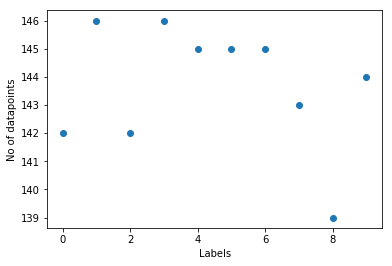

In [14]:
dict1=Counter(y_train)
plt.scatter(list(dict1.keys()),list(dict1.values()))
plt.xlabel("Labels")
plt.ylabel("No of datapoints")

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf=LogisticRegression(verbose=2)

In [19]:
clf.fit(X_train,y_train)

C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=2,
                   warm_start=False)

In [20]:
train_pred=clf.predict(X_train)
test_pred=clf.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

0.9965205288796103
0.9611111111111111


In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
clf=LogisticRegression()
param={'C':[10**i for i in range(-3,4)]}
model=RandomizedSearchCV(estimator=clf,param_distributions=param,verbose=2,random_state=42,scoring='accuracy',return_train_score=True)

In [34]:
model.fit(X_train,y_train)

C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Spe

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.1s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.1s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.1s
[CV] C=0.01 ..........................................................


C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........................................... C=0.01, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.1s
[CV] C=0.1 ...........................................................


C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................................ C=0.1, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.1s
[CV] C=0.1 ...........................................................


C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................................ C=0.1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.2s
[CV] C=1 .............................................................


C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\lo

[CV] .............................................. C=1, total=   0.2s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.2s
[CV] C=10 ............................................................


C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................................. C=10, total=   0.2s
[CV] C=10 ............................................................


C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................................. C=10, total=   0.2s
[CV] C=10 ............................................................


C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................................. C=10, total=   0.2s
[CV] C=100 ...........................................................


C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................................ C=100, total=   0.3s
[CV] C=100 ...........................................................


C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................................ C=100, total=   0.3s
[CV] C=100 ...........................................................


C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................................ C=100, total=   0.3s
[CV] C=1000 ..........................................................


C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........................................... C=1000, total=   0.4s
[CV] C=1000 ..........................................................


C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........................................... C=1000, total=   0.4s
[CV] C=1000 ..........................................................


C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........................................... C=1000, total=   0.3s


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    4.0s finished
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=True, scoring='accuracy', 

In [36]:
model.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
result=model.cv_results_

In [42]:
result.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [47]:
train_score=result['mean_train_score']

In [48]:
train_score

array([0.96452634, 0.98468864, 0.99616561, 0.99755924, 0.99930045,
       1.        , 1.        ])

In [49]:
test_score=result['mean_test_score']
test_score

array([0.94084899, 0.95059151, 0.9519833 , 0.94989562, 0.93736952,
       0.93249826, 0.92693111])

In [62]:
c=[i for i in range(-3,4)]

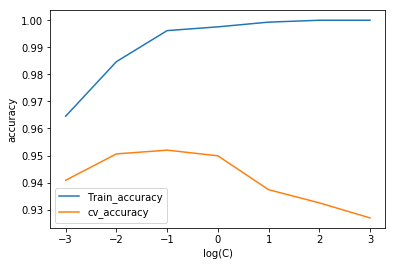

In [64]:
plt.plot(c,train_score,label='Train_accuracy')
plt.plot(c,test_score,label='cv_accuracy')
plt.xlabel('log(C)')
plt.ylabel("accuracy")
plt.legend()

In [66]:
model.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
clf=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
clf.fit(X_train,y_train)
train_pred=clf.predict(X_train)
test_pred=clf.predict(X_test)

C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Logistic Regression Train and Test accuracy

In [71]:
print("Train_Accuracy: ",accuracy_score(y_train,train_pred))
print("Test_Accuracy: ",accuracy_score(y_test,test_pred))

Train_Accuracy:  0.9916492693110647
Test_Accuracy:  0.9666666666666667


# Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
clf=DecisionTreeClassifier()

In [81]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [82]:
param={'max_depth':[1,5,7,10,20,30],'min_samples_split':[2,4,8,16,32]}

In [84]:
model=RandomizedSearchCV(estimator=clf,param_distributions=param,random_state=42,verbose=2,scoring='accuracy',
                         return_train_score=True)

In [86]:
model.fit(X_train,y_train)

C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] min_samples_split=8, max_depth=30 ...............................
[CV] ................ min_samples_split=8, max_depth=30, total=   0.1s
[CV] min_samples_split=8, max_depth=30 ...............................
[CV] ................ min_samples_split=8, max_depth=30, total=   0.0s
[CV] min_samples_split=8, max_depth=30 ...............................
[CV] ................ min_samples_split=8, max_depth=30, total=   0.0s
[CV] min_samples_split=2, max_depth=10 ...............................
[CV] ................ min_samples_split=2, max_depth=10, total=   0.0s
[CV] min_samples_split=2, max_depth=10 ...............................
[CV] ................ min_samples_split=2, max_depth=10, total=   0.0s
[CV] min_samples_split=2, max_depth=10 ...............................
[CV] ................ min_samples_split=2, max_depth=10, total=   0.0s
[CV] min_samples_split=16, max_depth=20 ..............................
[CV] ...........

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='b

In [87]:
result=model.cv_results_

In [88]:
result.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_min_samples_split', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [89]:
mean_train_score=result['mean_train_score']
mean_test_score=result['mean_test_score']

In [91]:
model.best_score_

0.8448155880306193

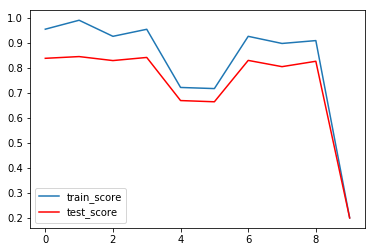

In [95]:
plt.plot(mean_train_score,label='train_score')
plt.plot(mean_test_score,color='red',label='test_score')
plt.legend()

In [97]:
print("Train_score: ",mean_train_score)
print("Test_Score: ",mean_test_score)

Train_score:  [0.95441132 0.99023805 0.92585881 0.95406155 0.72121883 0.71668925
 0.92585881 0.89731295 0.90878977 0.19902697]
Test_Score:  [0.83785665 0.84481559 0.82881002 0.84133612 0.66875435 0.66388309
 0.82950592 0.80445372 0.82602644 0.19902575]


In [98]:
model.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [99]:
clf=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [100]:
clf.fit(X_train,y_train)
train_pred=clf.predict(X_train)
test_pred=clf.predict(X_test)

# Decision Tree Train and Test Accuracy

In [101]:
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

0.9874739039665971
0.8194444444444444


# Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
clf=RandomForestClassifier()

In [104]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
param={'max_depth':[2,4,8,16,32],'min_samples_split':[2,3,4,6,8],'n_estimators':[20,50,100,200,500]}

In [106]:
model

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='b

In [108]:
model=RandomizedSearchCV(estimator=clf,param_distributions=param,n_iter=15,cv=5,n_jobs=-1,random_state=42,
                         scoring='accuracy',verbose=1,return_train_score=True)
model.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   24.7s finished
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [110]:
result=model.cv_results_
result.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'param_min_samples_split', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [114]:
mean_train_score=result['mean_train_score']
mean_test_score=result['mean_test_score']

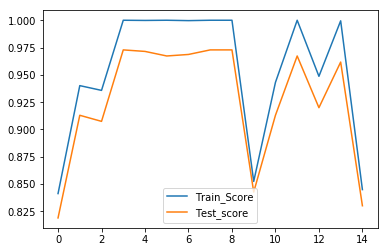

In [115]:
plt.plot(mean_train_score,label="Train_Score")
plt.plot(mean_test_score,label='Test_score')
plt.legend()

In [116]:
model.best_score_

0.9728601252609603

In [117]:
model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [118]:
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
clf.fit(X_train,y_train)
train_predict=clf.predict(X_train)
test_predict=clf.predict(X_test)

# Random Forest Train and Test Accuracy

In [120]:
print(accuracy_score(train_predict,y_train))
print(accuracy_score(test_predict,y_test))

1.0
0.9666666666666667


# GBDT

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

In [129]:
clf=GradientBoostingClassifier()

In [123]:
clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [132]:
param={'learning_rate':[0.1,0.2,0.4,0.6,0.8,0.5],'max_depth':[1,2,3,5,10],
       'subsample':[1.0,0.8,0.5]}

In [133]:
model=RandomizedSearchCV(estimator=clf,param_distributions=param,n_iter=20,verbose=1,return_train_score=True,
                        cv=5,scoring='accuracy',n_jobs=-1)

In [134]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                     

In [135]:
model.best_score_

0.964509394572025

In [137]:
model.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [139]:
result=model.cv_results_

In [140]:
result.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_subsample', 'param_max_depth', 'param_learning_rate', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [141]:
mean_train_score=result['mean_train_score']
mean_test_score=result['mean_test_score']

In [143]:
result['params']

[{'subsample': 0.5, 'max_depth': 2, 'learning_rate': 0.8},
 {'subsample': 1.0, 'max_depth': 1, 'learning_rate': 0.2},
 {'subsample': 0.5, 'max_depth': 2, 'learning_rate': 0.2},
 {'subsample': 0.5, 'max_depth': 1, 'learning_rate': 0.4},
 {'subsample': 0.5, 'max_depth': 3, 'learning_rate': 0.4},
 {'subsample': 0.8, 'max_depth': 10, 'learning_rate': 0.4},
 {'subsample': 0.8, 'max_depth': 3, 'learning_rate': 0.5},
 {'subsample': 0.8, 'max_depth': 2, 'learning_rate': 0.1},
 {'subsample': 0.8, 'max_depth': 5, 'learning_rate': 0.8},
 {'subsample': 0.5, 'max_depth': 3, 'learning_rate': 0.8},
 {'subsample': 1.0, 'max_depth': 1, 'learning_rate': 0.6},
 {'subsample': 0.5, 'max_depth': 3, 'learning_rate': 0.1},
 {'subsample': 1.0, 'max_depth': 3, 'learning_rate': 0.8},
 {'subsample': 1.0, 'max_depth': 10, 'learning_rate': 0.6},
 {'subsample': 0.5, 'max_depth': 10, 'learning_rate': 0.5},
 {'subsample': 0.8, 'max_depth': 5, 'learning_rate': 0.5},
 {'subsample': 1.0, 'max_depth': 2, 'learning_rate': 

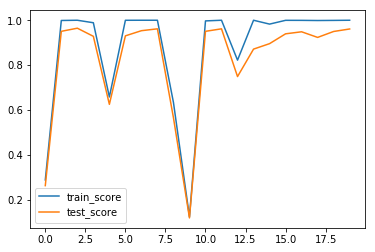

In [144]:
plt.plot(mean_train_score,label='train_score')
plt.plot(mean_test_score,label='test_score')
plt.legend()

In [145]:
clf=GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [146]:
clf.fit(X_train,y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [147]:
train_pred=clf.predict(X_train)
test_pred=clf.predict(X_test)
print(accuracy_score(train_pred,y_train))
print(accuracy_score(test_pred,y_test))

0.9617258176757133
0.9305555555555556


In [148]:

param={'learning_rate':[0.1,0.2,0.4,0.6,0.8,0.5],'max_depth':[1,2,3,5,10],
       'subsample':[1.0,0.8,0.5],'n_estimators':[20,50,100,200,500]}

In [149]:
clf=GradientBoostingClassifier()
model=RandomizedSearchCV(estimator=clf,param_distributions=param,n_iter=20,verbose=2,return_train_score=True,
                        cv=5,scoring='accuracy',n_jobs=-1)

In [150]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                     

In [151]:
model.best_score_

0.9679888656924147

In [153]:
model.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [158]:
result.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_subsample', 'param_n_estimators', 'param_max_depth', 'param_learning_rate', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [159]:
result=model.cv_results_
mean_train_score=result['mean_train_score']
mean_test_score=result['mean_test_score']
param=result['params']

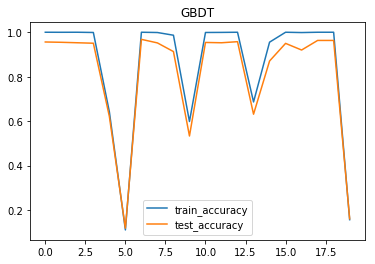

In [168]:
plt.title('GBDT')
plt.plot(mean_train_score,label='train_accuracy')
plt.plot(mean_test_score,label='test_accuracy')
plt.legend()

In [161]:
model.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [162]:
clf=GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [163]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [164]:
train_pred=clf.predict(X_train)
test_pred=clf.predict(X_test)

# GBDT train and test accuracy

In [167]:
print("GBDT")
print(accuracy_score(train_pred,y_train))
print(accuracy_score(test_pred,y_test))

GBDT
1.0
0.9611111111111111


In [94]:

from sklearn.ensemble import StackingClassifier

ImportError: cannot import name 'StackingClassifier'

In [25]:
from mlxtend.classifier import StackingClassifier

C:\Users\Shubham Kumar\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [29]:
from sklearn.linear_model import LogisticRegression
clf1=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf2=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf3=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
clf4=GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [55]:
clf5=GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [35]:
lr=LogisticRegression()

In [101]:
sclf = StackingClassifier(classifiers=[clf3,clf4], 
                          meta_classifier=clf3)

In [102]:
sclf.fit(X_train,y_train)

StackingClassifier(average_probas=False,
                   classifiers=[RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=16,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=50,
                                                  

In [103]:
train_pred=sclf.predict(X_train)

In [104]:
test_pred=sclf.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(train_pred,y_train)

1.0

In [106]:
accuracy_score(test_pred,y_test)

0.9666666666666667

In [93]:
sklearn.__version__

'0.21.2'